In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("../data/preprocessed/wwr_jobs_cleaned.csv")

X=df['job_title']+" "+df.get('job_description', " ")
y=df['job_category_rule']


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1,2)
)

X_vec=vectorizer.fit_transform(X)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

            Back-End       1.00      0.75      0.86         4
    Customer Support       0.33      1.00      0.50         1
              Design       0.75      1.00      0.86         3
   DevOps / Sysadmin       1.00      1.00      1.00         2
           Front-End       1.00      0.40      0.57         5
Management / Finance       0.88      0.78      0.82         9
               Other       0.88      0.74      0.80        19
   Sales / Marketing       0.58      1.00      0.74         7

            accuracy                           0.78        50
           macro avg       0.80      0.83      0.77        50
        weighted avg       0.84      0.78      0.78        50



In [15]:
df['job_catagory_nlp']=model.predict(X_vec)

comparison=(
    df[['job_category_rule', 'job_catagory_nlp']].value_counts().head(10)
)

print(comparison)

job_category_rule     job_catagory_nlp    
Other                 Other                   70
Sales / Marketing     Sales / Marketing       46
Management / Finance  Management / Finance    28
DevOps / Sysadmin     DevOps / Sysadmin       24
Back-End              Back-End                18
Customer Support      Customer Support        12
Design                Design                  11
Front-End             Front-End               10
Product               Product                  6
Full-Stack            Full-Stack               5
Name: count, dtype: int64


Text(0.5, 1.0, 'Job Category Classification - NLP Model')

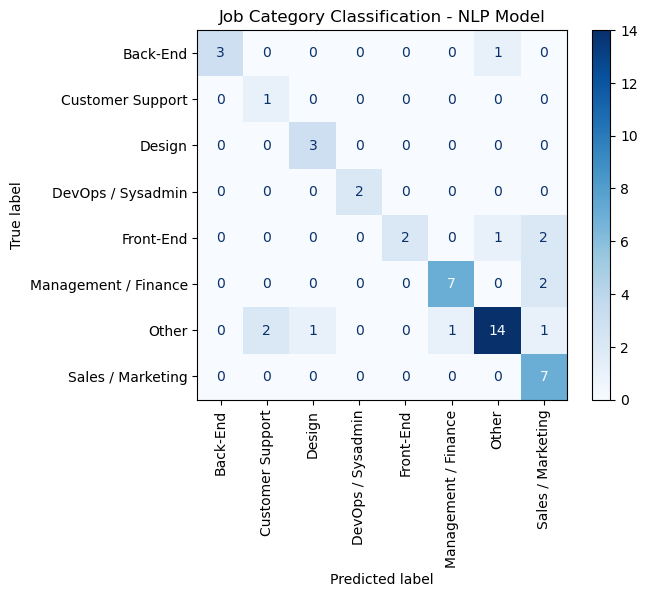

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues',xticks_rotation=90)
plt.title('Job Category Classification - NLP Model')

In [23]:
import joblib  

joblib.dump(model, '../models/job_category_nlp_model.pkl')
joblib.dump(vectorizer, '../models/tfidf_vectorizer.pkl')

['../models/tfidf_vectorizer.pkl']